Document for Model training



Importing packages

In [1]:
import matplotlib.pyplot as plt
#from SynDataFunctionality.TreeLib import Tree, gen_tree
import numpy as np
#from SynDataFunctionality.genInputFromLabel import labelToInput
import torch.utils.data as td
import torchvision
import math


Splitting data

Make some trees 

In [2]:
from syn_data_functionality.save_syn_data import gen_syn_data
import torch.utils.data as td
from data_sets import SynData, BackgroundData

Make and save some synthetic data

Transformations for backgrounds

In [3]:
from torchvision.transforms import RandomRotation, RandomResizedCrop, RandomHorizontalFlip, Resize

bg_trans = [
    RandomRotation(degrees=(-10, 10)),
    RandomResizedCrop(size=(736, 736), scale=(0.6, 0.95), ratio=(0.9, 1.1)),
    RandomHorizontalFlip(p=0.5),
    Resize(size=(736, 736))
]

In [4]:
bgDataSet = BackgroundData(r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\Backgrounds\02 V_4", transforms=bg_trans)
bfDataSet = BackgroundData(r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\bias_fields_model")

In [5]:
# parameters can be found in syn_data_functionality\save_syn_data
num = 4

# make num samples
gen_syn_data("test_data/syn_input", "test_data/syn_label", bgDataSet, (736, 736), num, bfDataSet)


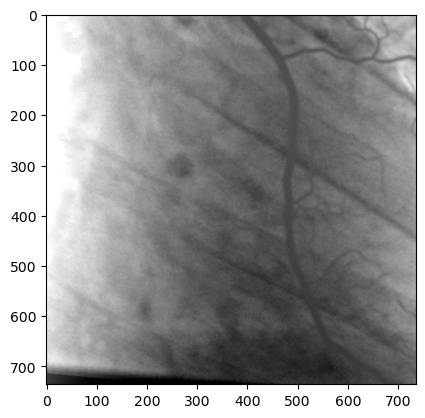

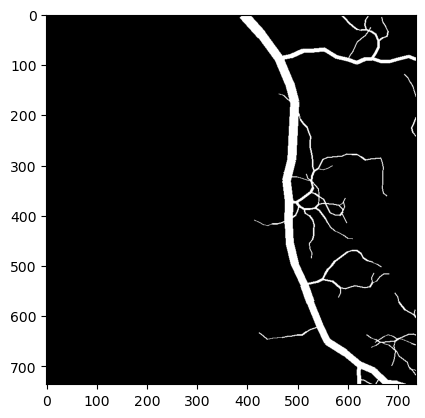

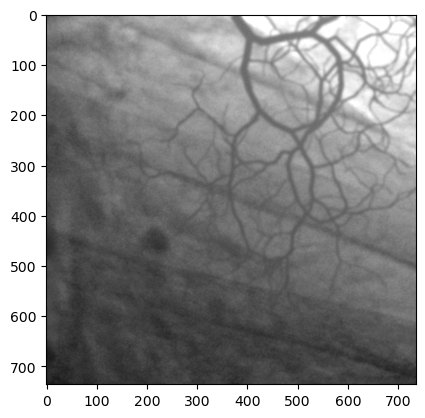

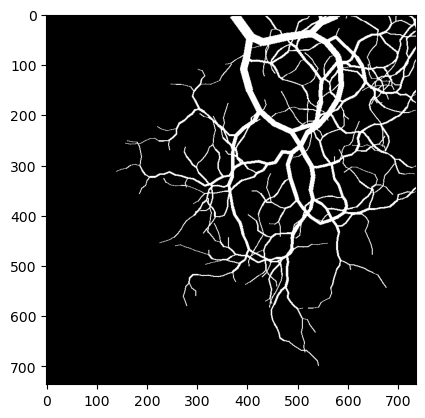

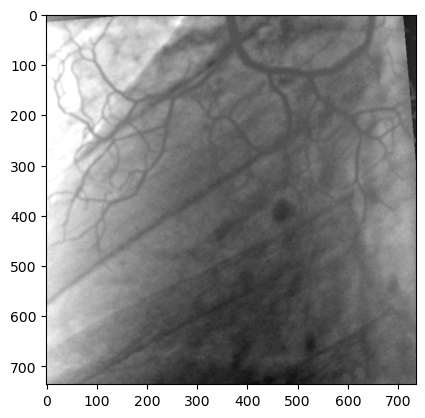

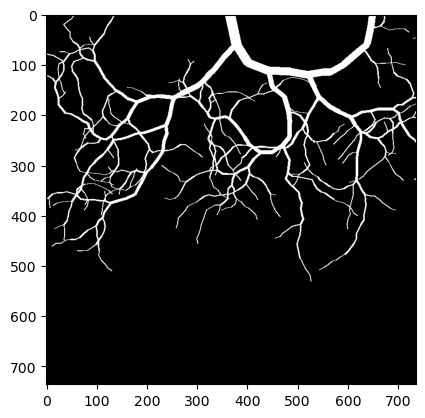

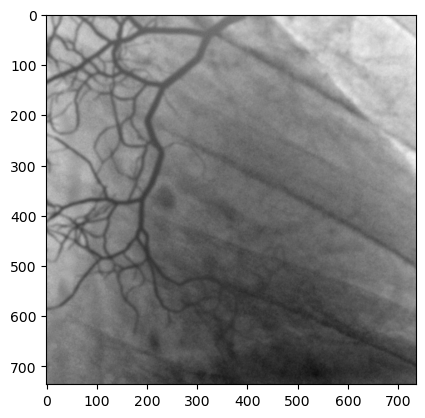

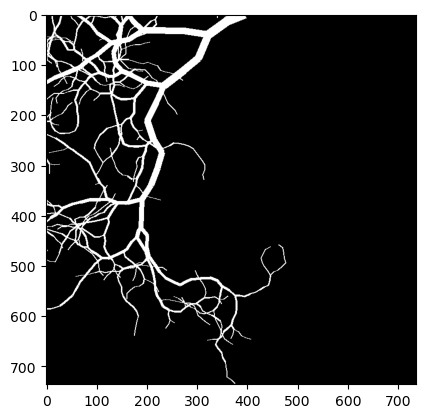

In [6]:
SynDataSet = SynData(r"test_data/syn_input", r"test_data/syn_label") #SynData(r"C:\Users\nugni\OneDrive\Skrivebord\Bachelor\local_data\syn_data\syn_data\syn_input", r"C:\Users\nugni\OneDrive\Skrivebord\Bachelor\local_data\syn_data\syn_data\syn_label")
test_loader = td.DataLoader(SynDataSet, batch_size=1)#, shuffle=True)

testIter = iter(test_loader)
for i in range(min(len(testIter), 20)):
    imgs, labs = next(testIter)
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.show()

Make our dataSet and it outputs data as expected

In [32]:
syn_data_path = r"C:\Users\nugni\OneDrive\Skrivebord\Bachelor\local_data\syn_data\syn_data"

In [37]:
from torchvision.transforms import Resize
import torchvision

SynDataSet = SynData(syn_data_path + "/syn_input", syn_data_path + "/syn_label")#, transforms_both=transformations)

#Test we can retrieve data from Dataset
test, lab = SynDataSet[0]
print(test.shape)
print(lab.shape)


torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


Make, train, validation and test data set of synthetic data

In [38]:
SynTrainData, SynValData, SynTestData = td.random_split(SynDataSet, train_val_test_split_probs)

Visualize synthetic generated data

0


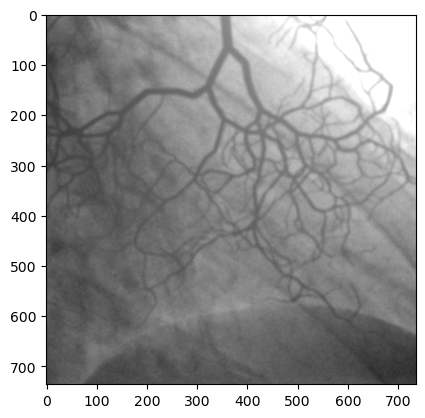

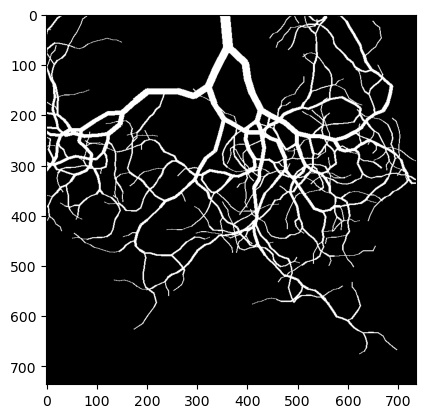

1


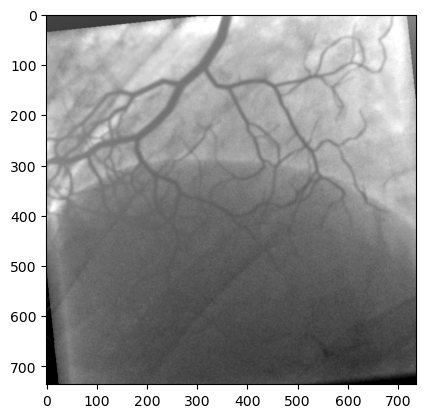

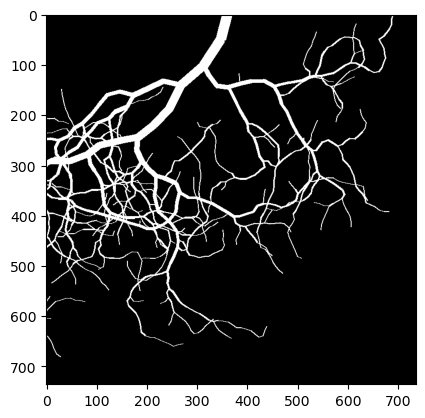

2


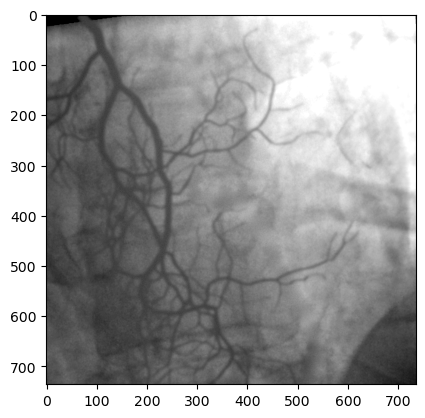

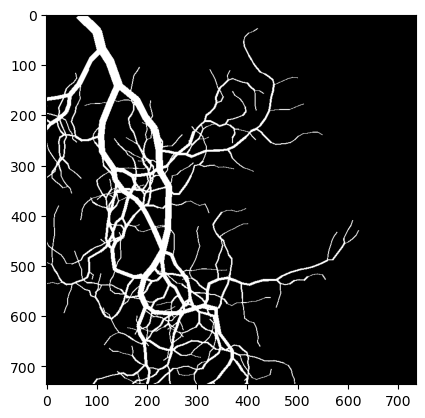

3


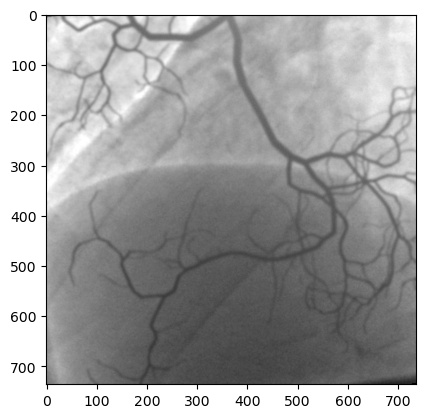

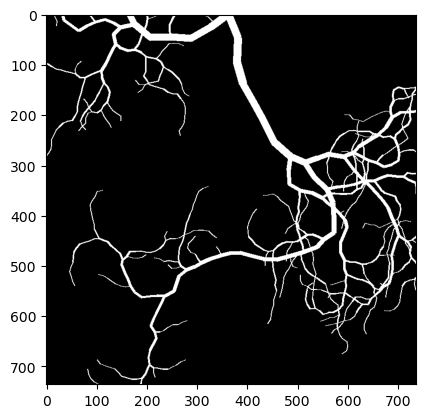

4


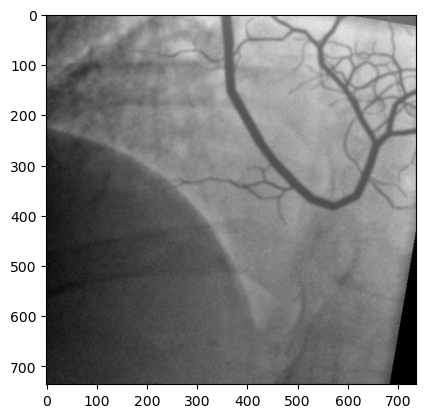

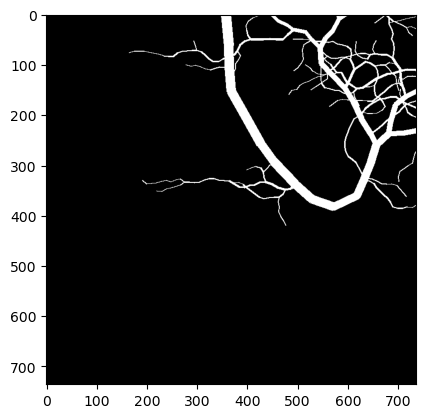

5


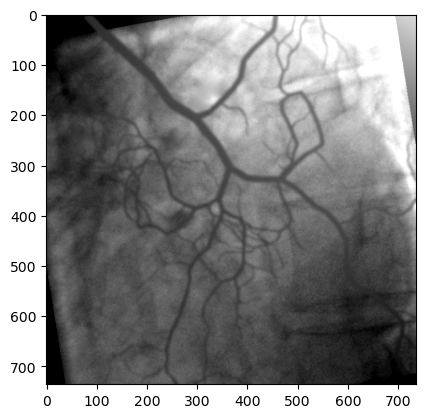

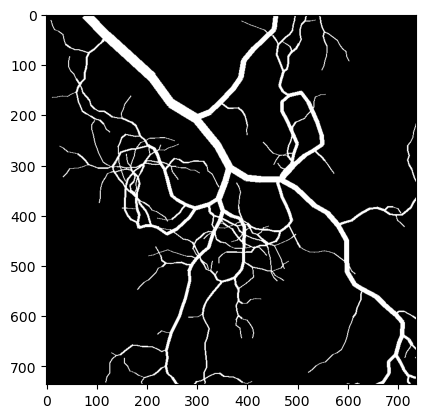

6


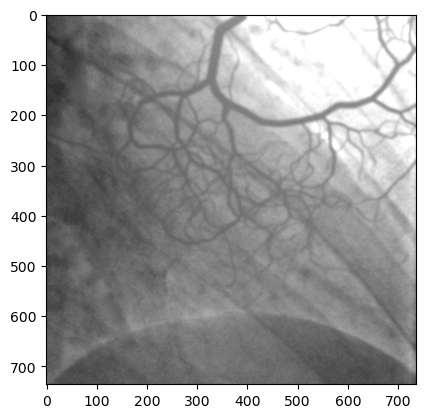

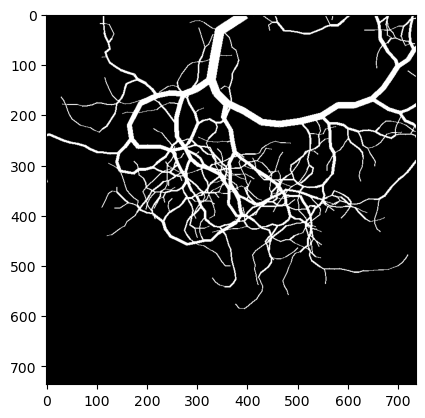

7


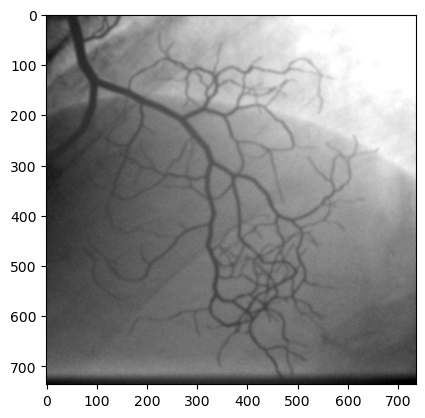

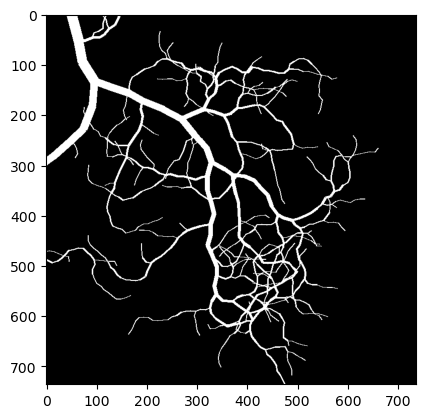

8


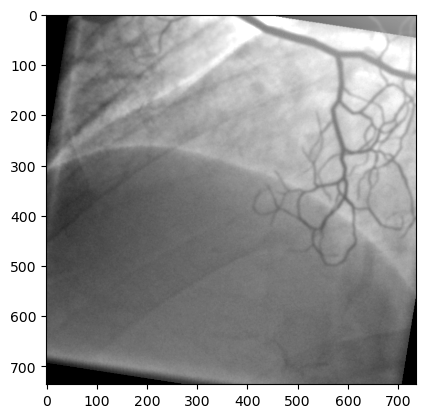

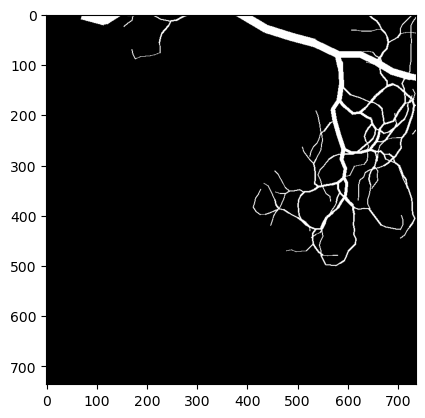

9


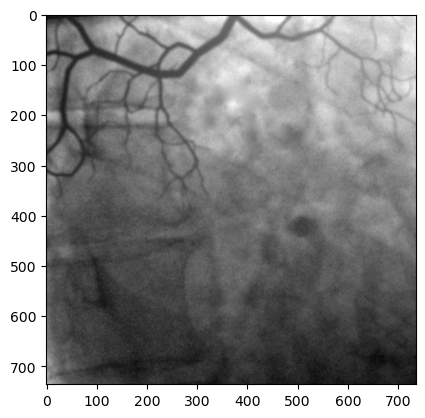

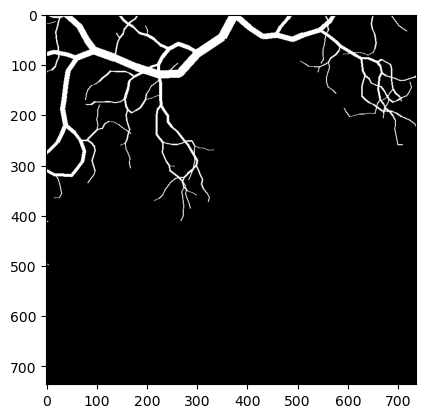

10


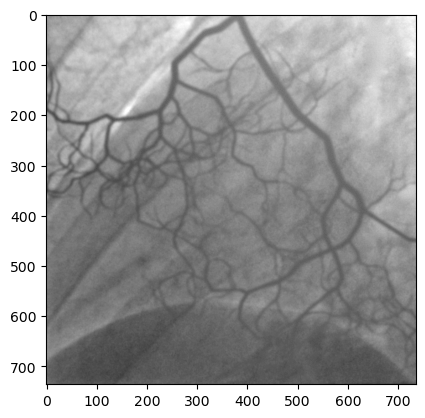

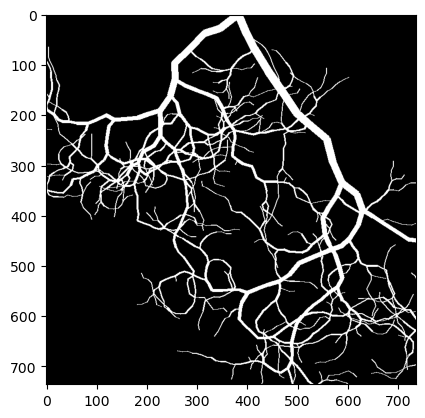

11


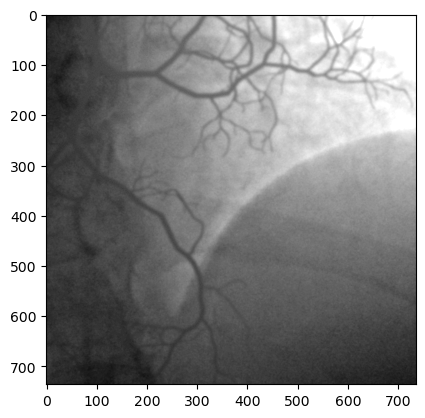

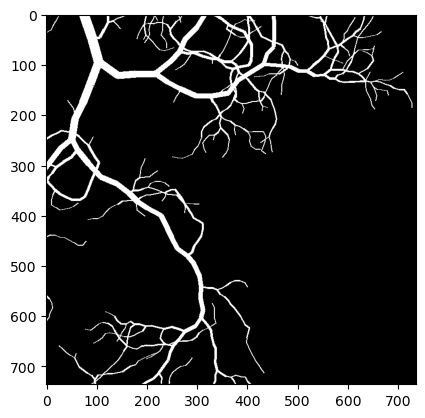

12


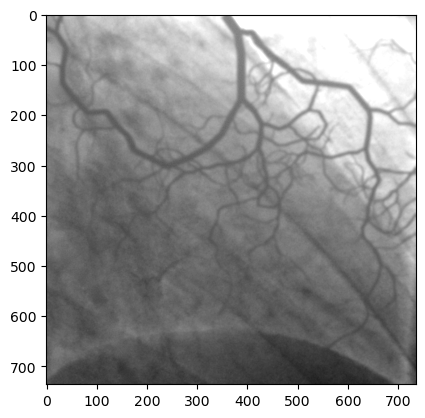

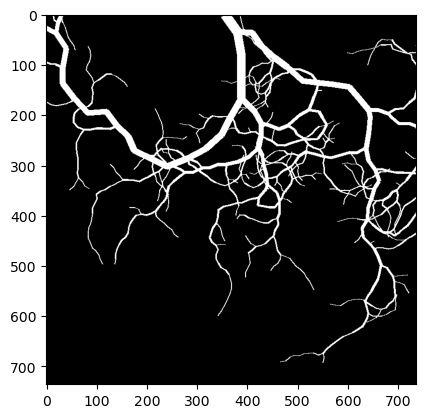

13


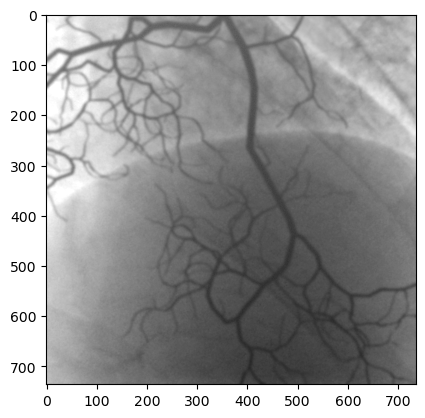

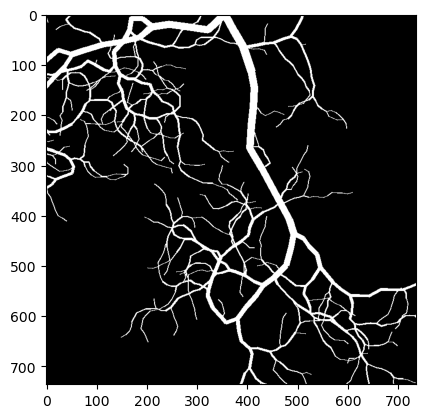

14


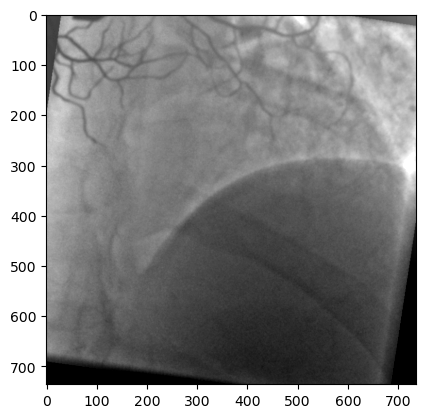

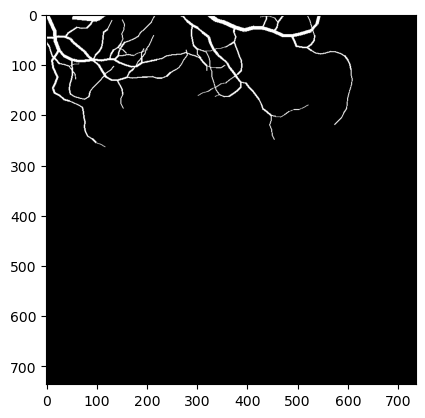

15


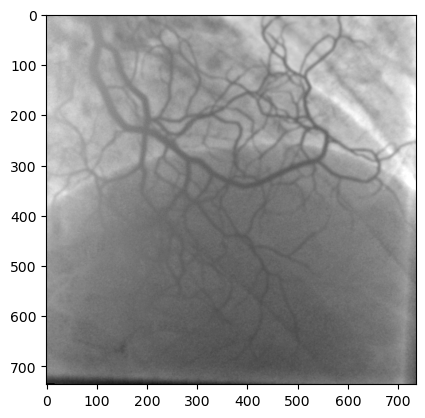

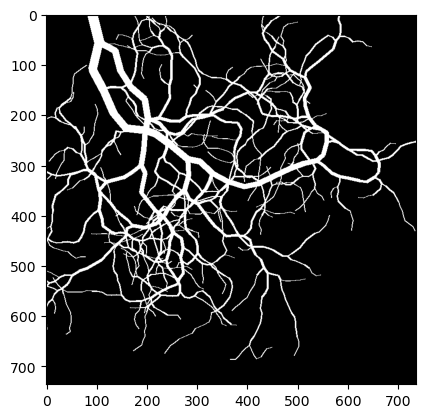

16


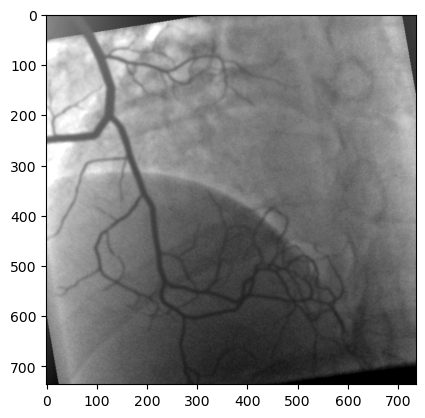

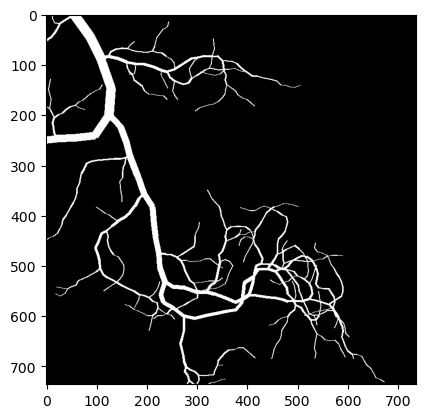

17


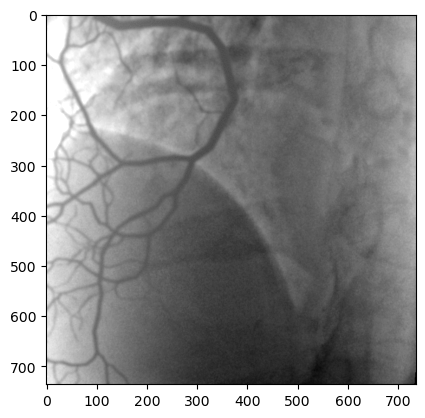

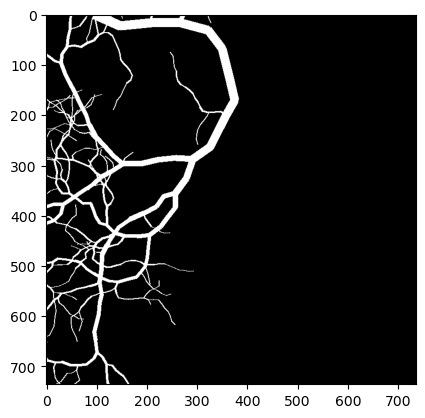

18


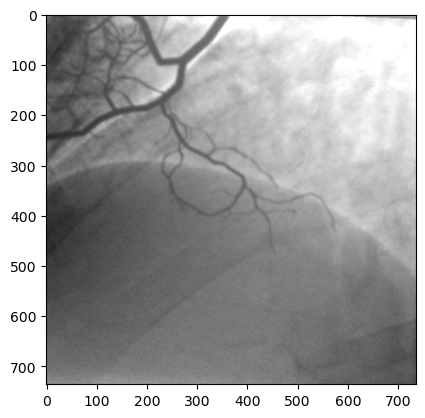

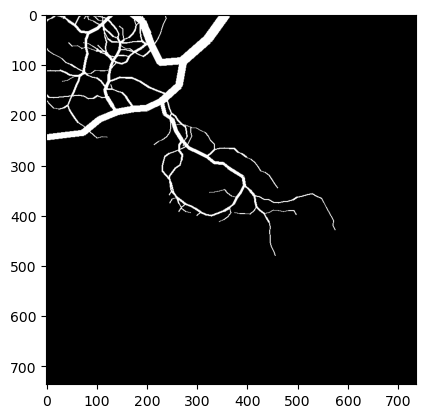

19


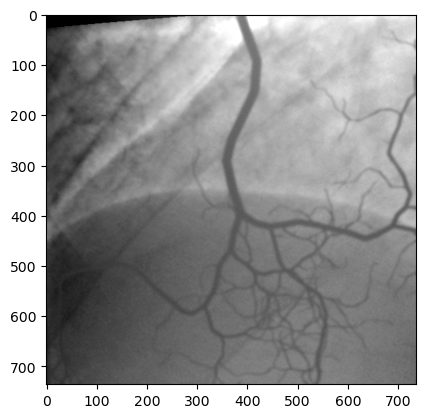

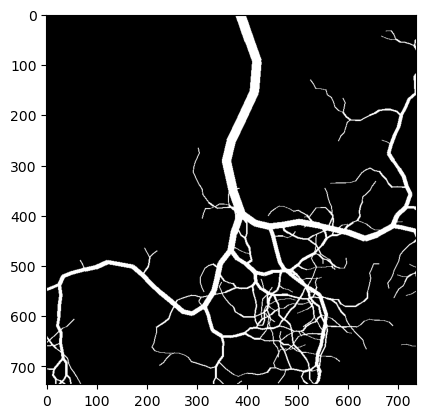

In [57]:
import torchvision

#test that dataloader works, and show images
test_loader = td.DataLoader(SynDataSet, batch_size=1, shuffle=True)

testIter = iter(test_loader)
for i in range(min(len(testIter), 20)):
    print(i)
    imgs, labs = next(testIter)
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.imsave("images_report/syn_images_for_report/img_" + str(i) + ".PNG", grid.numpy()[0], cmap="gray")
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.imsave("images_report/syn_images_for_report/lab_" + str(i) + ".PNG", lab_grid.numpy()[0], cmap="gray")
    plt.show()